In [1]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [7]:
#%pip install tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(oov_token='<UNK>')
tokenizer.fit_on_texts(docs)

In [8]:
tokenizer.word_index

{'<UNK>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [9]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [10]:
seq = tokenizer.texts_to_sequences(docs)
seq

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [11]:
from tensorflow.keras.utils import pad_sequences

seq = pad_sequences(seq, padding='post', truncating='post')
seq

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [23]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [24]:
len(X_train[0]),len(X_train[1])

(218, 189)

In [25]:
X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [26]:
len(X_train[0]),len(X_train[1])

(50, 50)

In [27]:
X_train[0:10]

array([[ 2071,    56,    26,   141,     6,   194,  7486,    18,     4,
          226,    22,    21,   134,   476,    26,   480,     5,   144,
           30,  5535,    18,    51,    36,    28,   224,    92,    25,
          104,     4,   226,    65,    16,    38,  1334,    88,    12,
           16,   283,     5,    16,  4472,   113,   103,    32,    15,
           16,  5345,    19,   178,    32],
       [ 8255,     5, 25249,   656,   245,  2350,     5,     4,  9837,
          131,   152,   491,    18, 46151,    32,  7464,  1212,    14,
            9,     6,   371,    78,    22,   625,    64,  1382,     9,
            8,   168,   145,    23,     4,  1690,    15,    16,     4,
         1355,     5,    28,     6,    52,   154,   462,    33,    89,
           78,   285,    16,   145,    95],
       [  215,    28,   610,    40,     6,    87,   326,    23,  2300,
           21,    23,    22,    12,   272,    40,    57,    31,    11,
            4,    22,    47,     6,  2307,    51,     9,   1

In [32]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()

c:\Users\Debdutta Chatterjee\Work\Project\Python\AI_ML_DS_GenAI_Portfolio\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor ='val_loss',
    patience =6,
    restore_best_weights = True,
    min_delta=0.00001
)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(
    X_train,y_train,
    epochs =30,
    validation_data=(X_test,y_test),
    batch_size=1000,
    callbacks = [early_stop]
    )

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5093 - loss: 0.6907 - val_accuracy: 0.5067 - val_loss: 0.6936
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5060 - loss: 0.6913 - val_accuracy: 0.5080 - val_loss: 0.6937
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5081 - loss: 0.6905 - val_accuracy: 0.5048 - val_loss: 0.6938
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5165 - loss: 0.6903 - val_accuracy: 0.5016 - val_loss: 0.6941
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5046 - loss: 0.6910 - val_accuracy: 0.5069 - val_loss: 0.6938
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5120 - loss: 0.6907 - val_accuracy: 0.5057 - val_loss: 0.6938
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5112 - loss: 0.6902 - val_accuracy: 0.5065 - val_loss: 0.6940


In [34]:
len(X_train), len(X_test),len(y_train), len(y_test)

(25000, 25000, 25000, 25000)

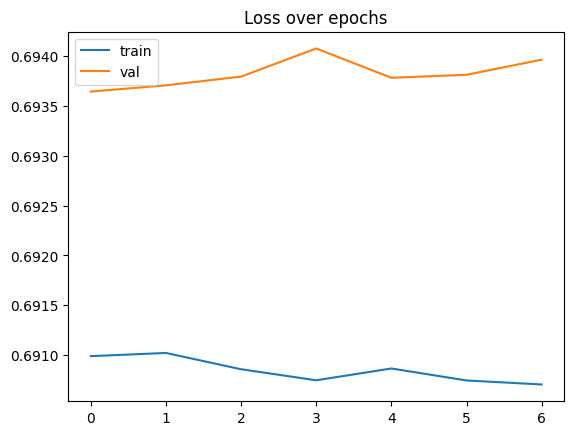

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title("Loss over epochs")
plt.show()


In [50]:
model1= Sequential()
model1.add(Embedding(17,output_dim=2, input_length=5))
model1.build(input_shape=(None, 5))
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 5, 2)           │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']


from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()


tokenizer.fit_on_texts(docs)

len(tokenizer.word_index)

sequences = tokenizer.texts_to_sequences(docs)
sequences

from tensorflow.keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(18,output_dim=2))

model.summary()

model.compile('adam','accuracy')

pred = model.predict(sequences)
print(pred)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
[[[ 0.01112391  0.03057216]
  [-0.02507752 -0.04500296]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]]

 [[-0.02507752 -0.04500296]
  [-0.02507752 -0.04500296]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]]

 [[ 0.01945319 -0.03591327]
  [ 0.01945319 -0.03591327]
  [-0.04137639 -0.03449589]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]]

 [[ 0.00292884 -0.02657448]
  [-0.00198625 -0.04793174]
  [ 0.00292884 -0.02657448]
  [-0.02507752 -0.04500296]
  [ 0.00292884 -0.02657448]]

 [[-0.01792135 -0.0402814 ]
  [ 0.00227618  0.00406069]
  [-0.03492427 -0.02256764]
  [-0.00610037  0.04991961]
  [ 0.00972813 -0.02144369]]

 [[-0.04343969 -0.03520945]
  [-0.04343969 -0.03520945]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.02144369]]

 [[ 0.02176163 -0.02084057]
  [ 0.02176163 -0.02084057]
  [ 0.00972813 -0.02144369]
  [ 0.00972813 -0.0214436

In [74]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000)

X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

model = Sequential()

model.add(Embedding(10000, 2))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.5353 - loss: 0.6800 - val_acc: 0.7862 - val_loss: 0.4558
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8163 - loss: 0.4148 - val_acc: 0.8114 - val_loss: 0.4176
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8648 - loss: 0.3314 - val_acc: 0.8025 - val_loss: 0.4505
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8878 - loss: 0.2830 - val_acc: 0.8000 - val_loss: 0.4460
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9041 - loss: 0.2527 - val_acc: 0.7980 - val_loss: 0.4743
